Проведено исследование, при котором был изменен дизайн сайта. 
Проверить, как повлияло это изменение на сумму покупки посетителями сайта. 
В файле "AB_test_purchases.csv" приведены данные о пользователях, разделенных на две группы: A (контрольную группу) и B (тестовую группу).
Изменения сайта были показаны только группе B, группа A осталась без изменений. 
Файл включает в себя 2 столбца: "Группа" (A и B), "Продажи" (сумма покупок каждого пользователя).

* Нулевая гипотеза предполагает, что результаты, группы А и В на самом деле не отличаются и что наблюдаемые различия случайны.

* Альтернативная гипотеза, что B отличается от A.

-------------------------------------------------------------------------------------------------------------------------------
**1. Проверка данных выборок А и В на нормальность распределения**

Для проверки данных на нормальность распределения применяется тест Шапиро-Уилка.
Используется функция shapiro из библиотеки scipy.stats для проверки нормальности распределения количества продаж в каждой группе. Результатом этой функции является значения статистики теста и p-значение.

Если p-значение больше заданного уровня значимости (alpha = 0.05), то можно опровергнуть гипотезу о нормальности распределения данных. Если p-значение меньше уровня значимости, то мы можем сделать вывод о том, что данные не имеют нормального распределения.

-------------------------------------------------------------------------------------------------------------------------------

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro
from scipy.stats import ttest_ind

In [2]:
data = pd.read_csv('AB_test_purchases.csv')
data.head()

,Группа,Продажи
0,A,1288.806623
1,A,1066.402841
2,A,585.400869
3,A,919.790311
4,A,1135.544329


In [3]:
data.tail()

,Группа,Продажи
395,B,928.035146
396,B,1019.034445
397,B,671.256505
398,B,1004.981098
399,B,1005.549712


In [4]:
# Разделение данных на две группы (A и B)
group_a = data[data['Группа'] == 'A']['Продажи']
group_b = data[data['Группа'] == 'B']['Продажи']

In [5]:
# Проверка данных группы A на нормальность с помощью теста Шапиро-Уилка
statistic_a, p_value_a = shapiro(group_a)

print("Для группы A:")
print("Статистика =", statistic_a)
print("p-value =", p_value_a)

alpha = 0.05 # уровень значимости

if p_value_a > alpha:
    print("Данные группы A можно считать нормально распределенными")
else:
    print("Данные группы A не являются нормально распределенными")

Для группы A:
Статистика = 0.9935725927352905
p-value = 0.5384828448295593
Данные группы A можно считать нормально распределенными


In [6]:
# Проверка данных группы B на нормальность с помощью теста Шапиро-Уилка
statistic_b, p_value_b = shapiro(group_b)

print("\nДля группы B:")
print("Статистика =", statistic_b)
print("p-value =", p_value_b)

if p_value_b > alpha:
    print("Данные группы B можно считать нормально распределенными")
else:
    print("Данные группы B не являются нормально распределенными")


Для группы B:
Статистика = 0.9963352084159851
p-value = 0.9176192283630371
Данные группы B можно считать нормально распределенными


Text(0.5, 0, 'Сумма продаж')

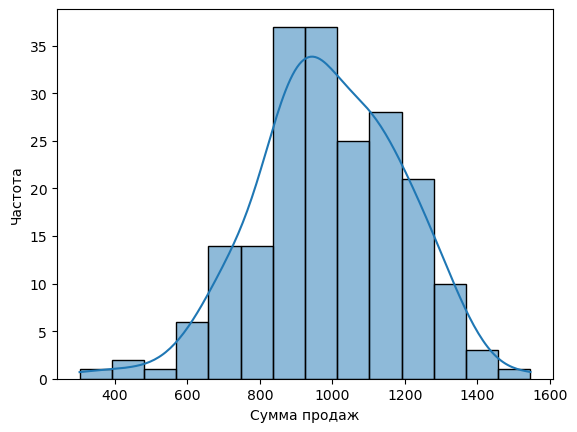

In [7]:
# Гистограмма группы A
ax_a = sns.histplot(group_a, kde=True)
plt.ylabel('Частота')
plt.xlabel('Сумма продаж')

Text(0.5, 0, 'Сумма продаж')

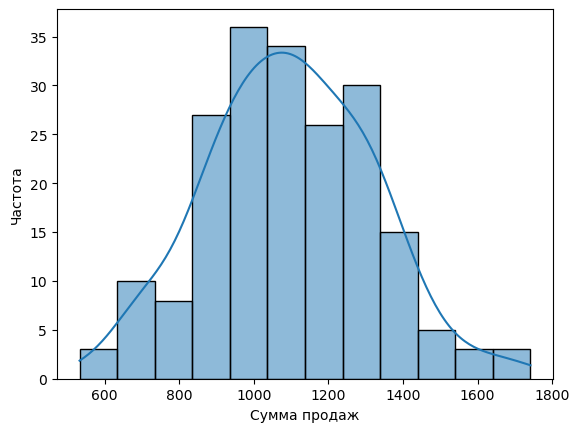

In [8]:
# Гистограмма группы B
ax_b = sns.histplot(group_b, kde=True)
plt.ylabel('Частота')
plt.xlabel('Сумма продаж')

-------------------------------------------------------------------------------------------------------------------------------
**2. Проведение t-теста**

Т.к. было выяснено, что данные распределены нормально, то используется функция ttest_ind из библиотеки scipy.stats для проведения t-теста и сравнения средних значений количества продаж в группах.

В результате программы выводятся средние значения количества продаж в каждой группе, t-статистика и p-значение.
По p-значению мы можем сделать вывод о статистической значимости различий между группами (если p-значение меньше уровня значимости alpha = 0.05, то различия считаются статистически значимыми).

-------------------------------------------------------------------------------------------------------------------------------

In [9]:
# Разделение данных на две группы (A и B)
group_a = data[data['Группа'] == 'A']
group_b = data[data['Группа'] == 'B']

# Проведение t-теста для сравнения среднего значения количества продаж в группах
t_stat, p_value = ttest_ind(group_a['Продажи'], group_b['Продажи'])

In [10]:
# Вывод результатов
print('Результаты A/B тестирования:')
print('----------------------------')
print('Среднее значение количества продаж в группе A:', group_a['Продажи'].mean())
print('Среднее значение количества продаж в группе B:', group_b['Продажи'].mean())
print('t-статистика:', t_stat)
print('p-значение:', p_value)

Результаты A/B тестирования:
----------------------------
Среднее значение количества продаж в группе A: 991.5092569136742
Среднее значение количества продаж в группе B: 1096.1901788285038
t-статистика: -4.929271369970533
p-значение: 1.213659265156133e-06


Чтобы вывести заключение о принятии нулевой гипотезы или ее отклонении, сравниваем критическое значение (уровень значимости alpha = 0.05) с полученным p-значением. Если p-значение меньше уровня значимости, то нулевая гипотеза отвергается, если p-значение больше или равно уровню значимости, то нет оснований отвергать нулевую гипотезу.

In [11]:
# Уровень значимости (критическое значение)

alpha = 0.05

# Проверка нулевой гипотезы

if p_value < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Принимаем нулевую гипотезу')

Отвергаем нулевую гипотезу


**Вывод:** По результатам теста нулевая гипотеза отвергается. Изменение дизайна сайта действительно повлияло на сумму покупки и средняя сумма покупки стала выше.